In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import factorial

# 1) Polynomial Approximation with Derivatives

## A Brief Intro to `sympy`

Here we import `sympy`, a package for symbolic computation with Python.

In [2]:
import sympy as sp
sp.init_printing()

Next, we make a (symbolic) variable $x$ from which we can then build more complicated expressions:

In [3]:
sp.var("x")
x

Build up an expression with $x$. Assign it to `expr`. Observe that this expression isn't evaluated--the result of this computation is some Python data that represents the computation:

In [4]:
g = sp.sin(sp.sqrt(x)+2)**2
g

Next, take a derivative, using `.diff(x)`.

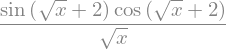

In [5]:
g.diff(x)

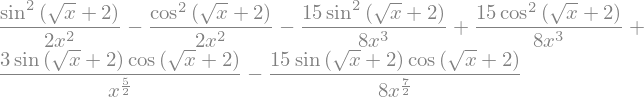

In [6]:
g.diff(x, 4)

Use `.subs(x, ...)` and `.evalf()` to evaluate your expression for $x=1$.

In [7]:
g.subs(x,1)

In [8]:
g.subs(x, 1).evalf()

Helper function that takes symbolic functions as argument and plot them

In [9]:
def plot_sympy(my_f, my_pts, **kwargs):
    f_values = np.array([my_f.subs(x, pt) for pt in my_pts])
    plt.plot(my_pts, f_values, **kwargs)

    
    
def semilogy_sympy(my_f, my_pts, **kwargs):
    f_values = np.array([my_f.subs(x, pt) for pt in my_pts])
    plt.semilogy(my_pts, f_values, **kwargs)

## Example 1:

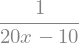

In [10]:
f = 1/(20*x-10)
f

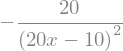

In [11]:
f.diff(x)

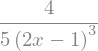

In [12]:
f.diff(x,2)

Write out the degree 2 Taylor polynomial about 0:

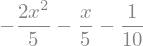

In [13]:
taylor2 = (
    f.subs(x, 0)
    + f.diff(x).subs(x, 0) * x
    + f.diff(x, 2).subs(x, 0)/2 * x**2
)
taylor2

Plot the exact function `f` and the taylor approximation `taylor2`

In [14]:
pts = np.linspace(-0.4,0.4)

Text(0, 0.5, 'function values')

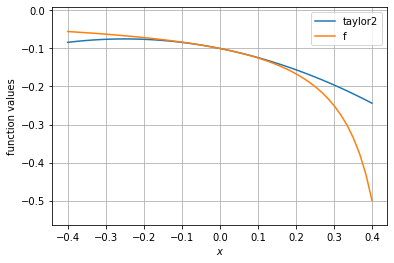

In [15]:
plot_sympy(taylor2, pts, label="taylor2")
plot_sympy(f, pts, label="f")
plt.legend(loc="best")
plt.axis('equal')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('function values')

## Behavior of the Error

Let's write the taylor approximation for any degree `n`, and define the error as `f - tn`. 

In [16]:
n = 2

tn = 0
for i in range(n+1):
    tn += f.diff(x, i).subs(x, 0)/factorial(i) * x**i

**Be careful** when writing Taylor approximations using a for loop in Python! If you want a Taylor of degree `n`, remember that to include the term `x**n` you need to have `range(n+1)` (see above).

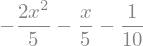

In [17]:
tn

Text(0, 0.5, 'function values')

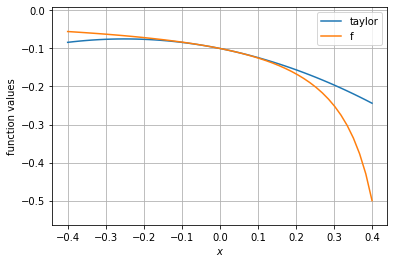

In [18]:
plot_sympy(tn, pts, label="taylor")
plot_sympy(f, pts, label="f")
plt.legend(loc="best")
plt.axis('equal')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('function values')

We cand define the error as:

In [19]:
error = f - tn

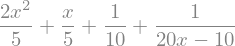

In [20]:
error

Text(0, 0.5, 'error')

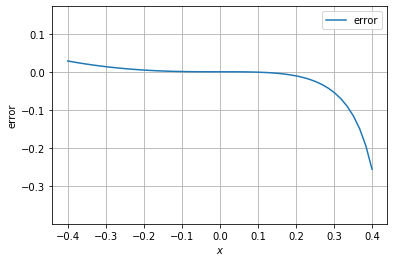

In [21]:
plot_sympy(error, pts, label="error")
plt.legend(loc="best")
plt.ylim([-1.3, 1.3])
plt.axis('equal')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('error')

To get a better idea of what happens close to the center (remember that the error for Taylor is a power function!)

In [22]:
# plot only points close to zero [10^(-3),10^(0.1)]
pos_pts = 10**np.linspace(-3, 0.1)

err_values = [error.subs(x, pt) for pt in pos_pts]

Text(0, 0.5, 'Error')

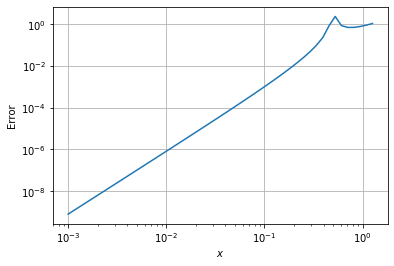

In [23]:
plt.loglog(pos_pts, np.abs(err_values))
plt.grid()
plt.xlabel("$x$")
plt.ylabel("Error")

What should be the slope of the error plot? You should know how to get the slope, since you know the error for a Taylor approximation of degree $n$ goes as of $O(h^{n+1})$ when $h \rightarrow 0$. Does your expected value matches what you can extract from the plot?

In case you are wondering why the kink in the plot, take a look at the plot below, where we represent the error, the exact function, and the taylor approximation all together (you should be able to see that $f(x) = t_n(x) + error$

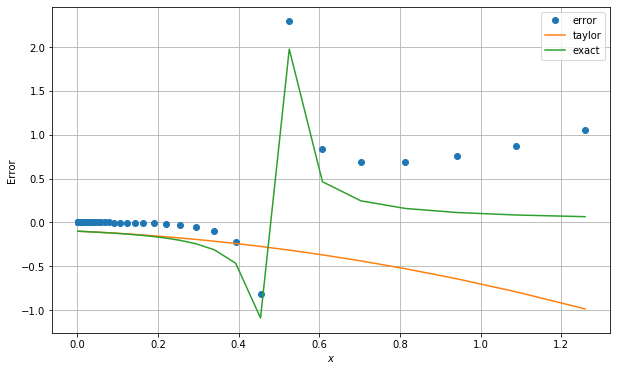

In [24]:
plt.figure(figsize=(10,6))
plt.plot(pos_pts, err_values,'o', label='error')
plot_sympy(tn, pos_pts, label="taylor")
plot_sympy(f, pos_pts, label="exact")
plt.grid()
plt.xlabel("$x$")
plt.ylabel("Error")
plt.legend()


Do you know why the discontinuity for the exact function? Take a look back at the analytical function:

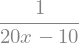

In [25]:
f

Does it make sense now?


## Example 2:

This is the prediction example that appears in the lecture. Take a look how you can predict the error from a Taylor approximation.

In [26]:
f = sp.sqrt(x-10)

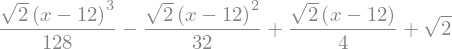

In [27]:
n = 3
x0 = 12

tn = 0
for i in range(n+1):
    tn += f.diff(x, i).subs(x, x0)/factorial(i) * (x-x0)**i
tn

The error of the Taylor approximation of degree 3 about x0 = 12 when h=0.5 is (that is, x = 12.5):

In [28]:
f.subs(x, 12.5)

In [29]:
tn.subs(x, 12.5).evalf()

In [30]:
error1 = f.subs(x, 12.5) - tn.subs(x, 12.5).evalf()
abs(error1)

Now predict the error at $12.25$:

and the actual error is:

In [31]:
error2 = f.subs(x, 12.25) - tn.subs(x, 12.25).evalf()
abs(error2)

## Example 3:

Take the exponential function:

In [39]:
g = sp.exp(x)
g

Get the Taylor Series about the point $x_0 = 2$

In [40]:
n = 3
xo = 2

taylor = 0

for i in range(n+1):
    taylor += g.diff(x, i).subs(x, xo)/factorial(i) * (x-xo)**i

error =  g - taylor

You can see the Taylor approximation "matches" the exact function close to the point of the expansion, here  $x_0 = 2$.

Text(0, 0.5, 'function values')

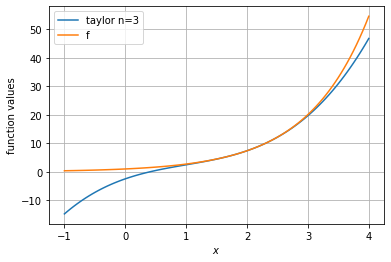

In [41]:
pts = np.linspace(-1, 4, 100)
plot_sympy(taylor, pts, label="taylor n=3")
plot_sympy(g, pts, label="f")
plt.legend(loc="best")
plt.grid()
plt.xlabel('$x$')
plt.ylabel('function values')

Let's take a look at the error plot:

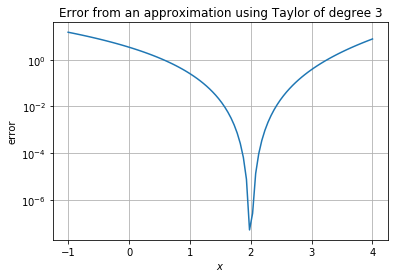

In [43]:
semilogy_sympy(error, pts, label="error")
plt.grid()
plt.xlabel('$x$')
plt.ylabel('error')
plt.title('Error from an approximation using Taylor of degree 3');

As expected, you can see the asymptotic decrease of the error as the point in which we are computing the approximation, the point $x$, approaches the point of expansion $x_o$. This is the same as saying $h \rightarrow 0$. In this case, we say that the error can be expressed as

$$ error = O((x-2)^{4}) $$

It would be also correct to write $ error = O((x)^{4}) $, since we can find a constant $M$ such that $M (x)^{4}$ is also a bound for the error. However, the function $(x)^{4}$ does not have the same asymptotic behavior as the error. Note that all the functions below provide an upper bound for the error:

Text(0, 0.5, 'error')

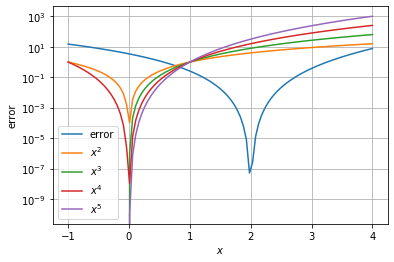

In [35]:
semilogy_sympy(error, pts, label="error")
f2=x**2
f3=x**3
f4=x**4
f5=x**5
semilogy_sympy(f2, pts, label="$x^2$")
plot_sympy(f3, pts, label="$x^3$")
plot_sympy(f4, pts, label="$x^4$")
plot_sympy(f5, pts, label="$x^5$")
plt.legend(loc="best")
plt.grid()
plt.xlabel('$x$')
plt.ylabel('error')